# Baseline Models Training

This notebook trains baseline RoBERTa models for all classification tasks.

In [1]:
import sys
import matplotlib.pyplot as plt
sys.path.append('../')

from src.data.dataset_generator import DatasetGenerator
from src.models.causality_base_model import CausalityBaselineTrainer
from src.models.certainty_base_model import CertaintyBaselineTrainer
from src.models.generalization_base_model import GeneralizationBaselineTrainer
from src.utils.evaluation import EvaluationUtils

In [2]:
from transformers import set_seed
set_seed(42)

## Generate Datasets

In [3]:
# Generate all datasets
generator = DatasetGenerator(data_dir = "../data", temp_dir = "../temp")
generator.generate_all_datasets()
print("Datasets generated successfully!")

Datasets generated successfully!


## Train Causality Model

In [4]:
# Train causality classification model
causality_trainer = CausalityBaselineTrainer(use_compressed_data = True, output_dir = "../out", temp_dir = "../temp")
causality_results = causality_trainer.run_training()

Map:   0%|          | 0/1340 [00:00<?, ? examples/s]

Map:   0%|          | 0/334 [00:00<?, ? examples/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/Users/hannayakusevych/miniconda3/envs/distortion-framing/lib/python3.10/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss
10,1.090500
20,1.094900
30,1.086200
40,1.106500
50,1.100800
60,1.122200
70,1.093700
80,1.083200
90,1.100100
100,1.110900


/Users/hannayakusevych/miniconda3/envs/distortion-framing/lib/python3.10/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/Users/hannayakusevych/miniconda3/envs/distortion-framing/lib/python3.10/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Causality F1 scores per class: [0.58252427 0.52631579 0.58498024]
Causality Macro F1: 0.5646


## Train Certainty Model

In [5]:
# Train certainty classification model
certainty_trainer = CertaintyBaselineTrainer(use_compressed_data = True, output_dir = "../out", temp_dir = "../temp")
certainty_results = certainty_trainer.run_training()

Map:   0%|          | 0/1340 [00:00<?, ? examples/s]

Map:   0%|          | 0/334 [00:00<?, ? examples/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/Users/hannayakusevych/miniconda3/envs/distortion-framing/lib/python3.10/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss
10,1.120000
20,1.117500
30,1.114600
40,1.051300
50,1.081800
60,1.078800
70,1.082000
80,1.014700
90,1.050700
100,1.000300


/Users/hannayakusevych/miniconda3/envs/distortion-framing/lib/python3.10/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/Users/hannayakusevych/miniconda3/envs/distortion-framing/lib/python3.10/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Certainty F1 scores per class: [0.66898955 0.4537037  0.56969697]
Certainty Macro F1: 0.5641


# Train Generalization Model

In [6]:
# Train generalization classification model
general_trainer = GeneralizationBaselineTrainer(output_dir = "../out", temp_dir = "../temp")
general_results = general_trainer.run_training()

Map:   0%|          | 0/670 [00:00<?, ? examples/s]

Map:   0%|          | 0/167 [00:00<?, ? examples/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/Users/hannayakusevych/miniconda3/envs/distortion-framing/lib/python3.10/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss
10,1.204600
20,1.240600
30,1.158500
40,1.160300
50,1.151900
60,1.125200
70,1.093800
80,1.046700
90,1.034100
100,1.056500


/Users/hannayakusevych/miniconda3/envs/distortion-framing/lib/python3.10/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Generalization F1 scores per class: [0.45714286 0.33333333 0.72413793]
Generalization Macro F1: 0.5049


## Results Comparison

In [7]:
# Create results comparison table
results = {
    'causality': causality_results,
    'certainty': certainty_results,
    'generalization': general_results
}

eval_utils = EvaluationUtils()
results_table = eval_utils.create_results_table(results, ['causality', 'certainty', 'generalization'])
print(results_table)

             Task   Class_0   Class_1   Class_2  Macro_F1
0       causality  0.582524  0.526316  0.584980  0.564607
1       certainty  0.668990  0.453704  0.569697  0.564130
2  generalization  0.457143  0.333333  0.724138  0.504871


## Visualize Results

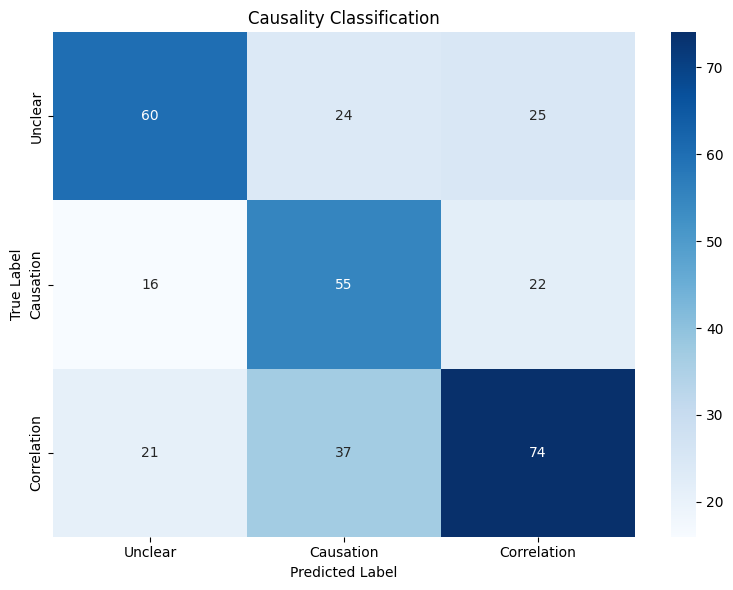

In [8]:
# Causality confusion matrix
cm_causality = eval_utils.compute_metrics(
    causality_results['true_labels'], 
    causality_results['predictions']
)['confusion_matrix']

eval_utils.plot_confusion_matrix(
    cm_causality, 
    list(causality_trainer.id2label.values()),
    "Causality Classification"
)

plt.tight_layout()
plt.show()

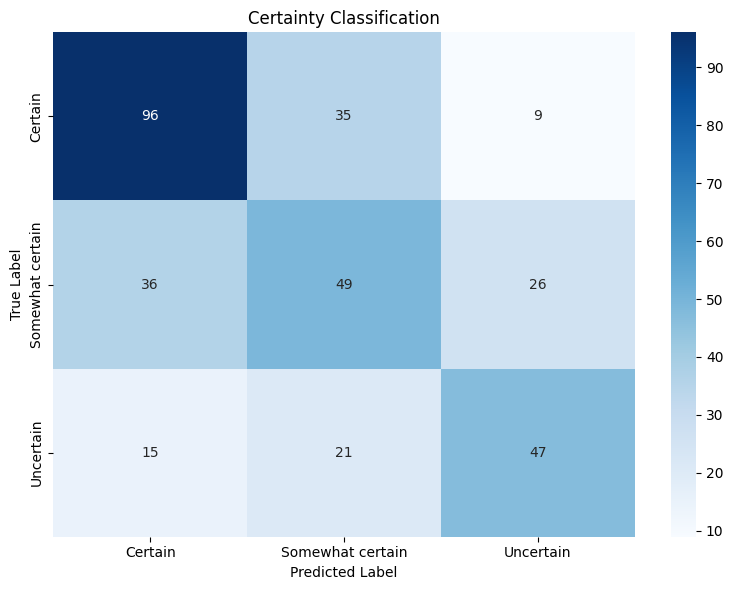

In [9]:
# Certainty confusion matrix
cm_certainty = eval_utils.compute_metrics(
    certainty_results['true_labels'], 
    certainty_results['predictions']
)['confusion_matrix']

eval_utils.plot_confusion_matrix(
    cm_certainty, 
    list(certainty_trainer.id2label.values()),
    "Certainty Classification"
)

plt.tight_layout()
plt.show()

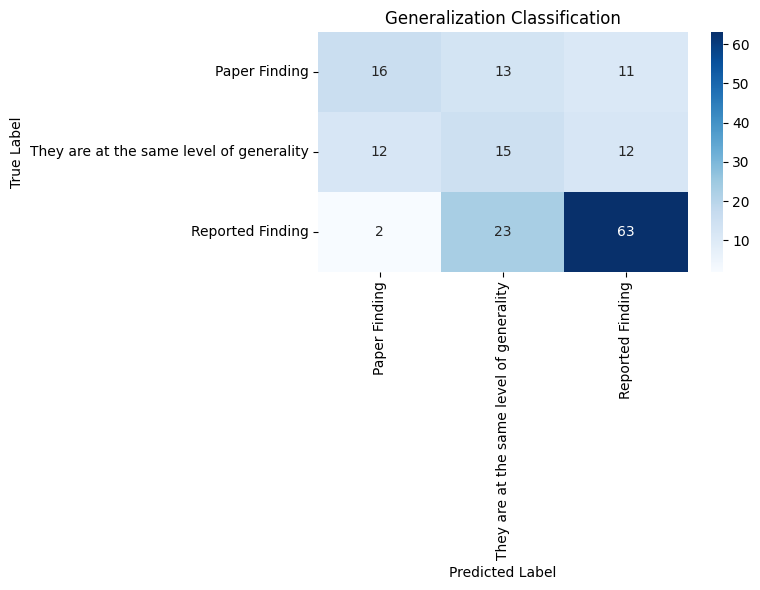

In [10]:
# Generalization confusion matrix
cm_general = eval_utils.compute_metrics(
    general_results['true_labels'], 
    general_results['predictions']
)['confusion_matrix']

eval_utils.plot_confusion_matrix(
    cm_general, 
    list(general_trainer.id2label.values()),
    "Generalization Classification"
)

plt.tight_layout()
plt.show()